In [2]:
from rmgpy.molecule.molecule import Molecule
from rmgpy.molecule.resonance import *

import timeit

In [2]:
mol1 = Molecule(SMILES="[CH]1CC1c1ccccc1")
out1 = generateResonanceIsomers(mol1)

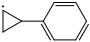

In [5]:
out1[0]

In [13]:
out2 = generateResonanceIsomers(Molecule(SMILES="CCN=N=[N-]"))

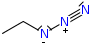

In [18]:
out2[2]

In [1]:
from unittest import *
import sys
import rmgpy.molecule.resonanceTest
tests = TestLoader().loadTestsFromModule(rmgpy.molecule.resonanceTest)
TextTestRunner(verbosity=2, stream=sys.stdout).run(tests)

testClarTransformation (rmgpy.molecule.resonanceTest.ClarTest)
Test that clarTransformation generates an aromatic ring. ... ok
testCorannulene (rmgpy.molecule.resonanceTest.ClarTest)
Test that we generate 5 Clar structures for corannulene ... ok
testPhenalene (rmgpy.molecule.resonanceTest.ClarTest)
Test that we generate 2 Clar structures for phenalene. ... ok
testPhenanthrene (rmgpy.molecule.resonanceTest.ClarTest)
Test that we generate 1 Clar structure for phenanthrene. ... ok
testAllylShift (rmgpy.molecule.resonanceTest.ResonanceTest)
Test allyl shift for hexadienyl radical ... ok
testAzide (rmgpy.molecule.resonanceTest.ResonanceTest)
Test resonance structure generation for ethyl azide ... ok
testFusedAromatic1 (rmgpy.molecule.resonanceTest.ResonanceTest)
Test we can make aromatic perylene from both adjlist and SMILES ... ok
testFusedAromatic2 (rmgpy.molecule.resonanceTest.ResonanceTest)
Test we can make aromatic naphthalene from both adjlist and SMILES ... ok
testFusedAromatic3 (rmg

<unittest.runner.TextTestResult run=24 errors=0 failures=0>